In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

In [9]:
df = pd.read_csv('data/dataset_processed.csv')

C:\Users\jayka\AppData\Local\Temp\ipykernel_5420\3423066480.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette=palette)


Text(0.5, 1.0, 'Artistas con mayor popularidad total')

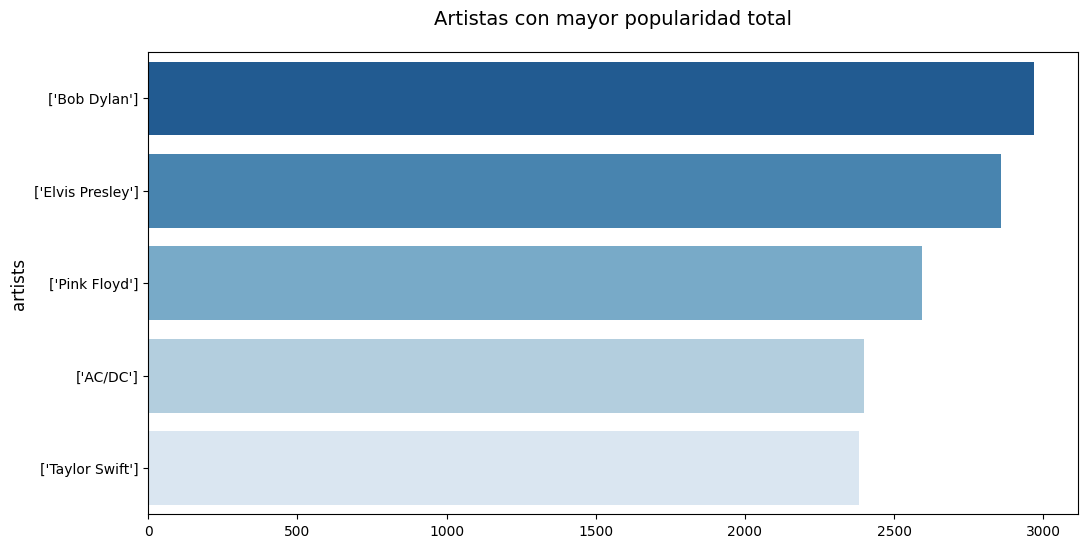

In [10]:
top_artists = df.groupby('artists')['popularity'].sum().sort_values(ascending=False).head(5)
palette = sns.color_palette("Blues", n_colors=len(top_artists))[::-1]
plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette=palette)
plt.title("Artistas con mayor popularidad total", pad=20)



C:\Users\jayka\AppData\Local\Temp\ipykernel_5420\946662612.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=decade_counts.index, y=decade_counts.values, palette=palette)


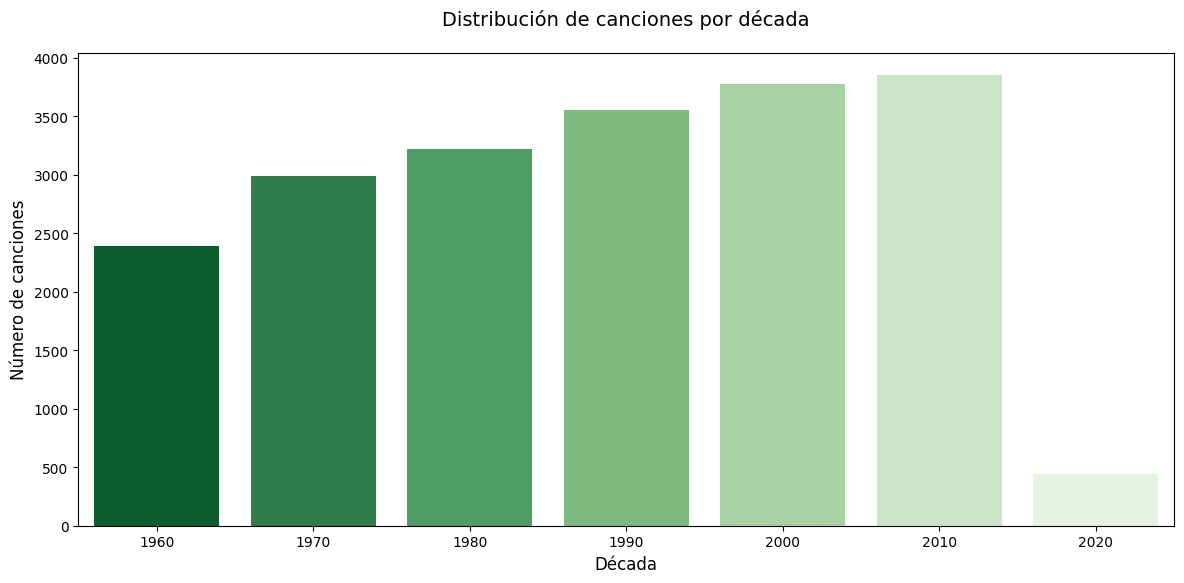

In [11]:
decade_counts = df['decade'].value_counts().sort_index()

palette = sns.color_palette("Greens", n_colors=len(decade_counts))[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=decade_counts.index, y=decade_counts.values, palette=palette)

plt.title("Distribución de canciones por década", pad=20)
plt.xlabel("Década")
plt.ylabel("Número de canciones")
plt.tight_layout()
plt.show()


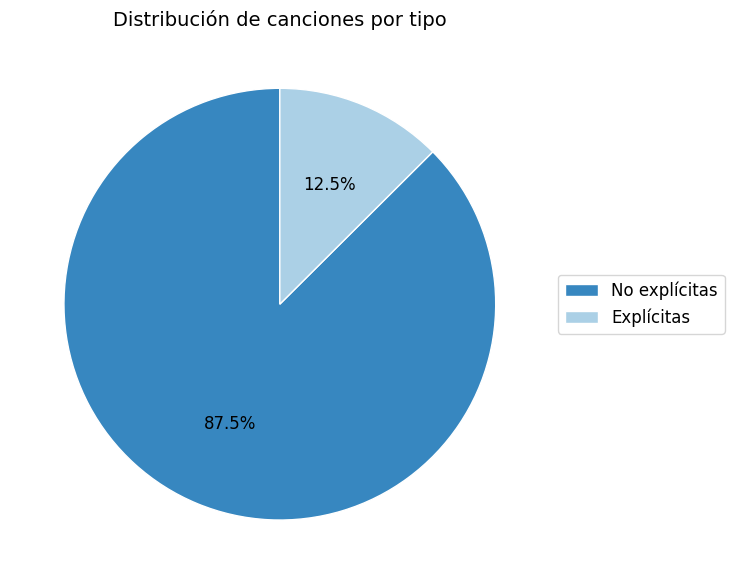

In [12]:
explicit_counts = df['explicit'].value_counts().sort_index()
labels = ['No explícitas', 'Explícitas']

palette = sns.color_palette("Blues", n_colors=2)[::-1]

plt.figure(figsize=(12, 6))

wedges, texts, autotexts = plt.pie(
    explicit_counts,
    autopct='%1.1f%%',
    startangle=90,
    colors=palette,
    textprops={'fontsize': 12},
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
)

plt.legend(
    wedges,
    labels,
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12,
)

plt.title("Distribución de canciones por tipo", fontsize=14, loc='center')
plt.tight_layout()
plt.show()


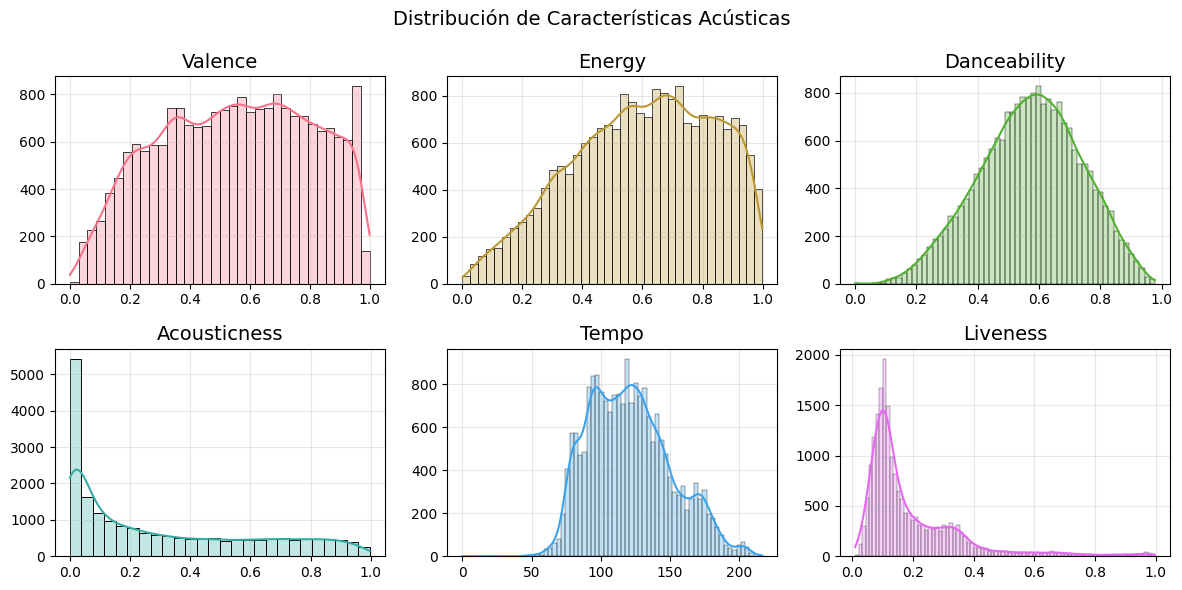

In [13]:
# Crear figura para distribuciones
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
fig.suptitle('Distribución de Características Acústicas', fontsize=14)

features = ['valence', 'energy', 'danceability', 'acousticness', 'tempo', 'liveness']
palette = sns.color_palette("husl", n_colors=len(features))

for i, (ax, feature) in enumerate(zip(axes.flat, features)):
    sns.histplot(data=df, x=feature, kde=True, ax=ax, color=palette[i], alpha=0.3)
    ax.set_title(feature.capitalize())
    ax.grid(True, alpha=0.3)
    ax.set(xlabel=None, ylabel=None)

plt.tight_layout()
plt.show()

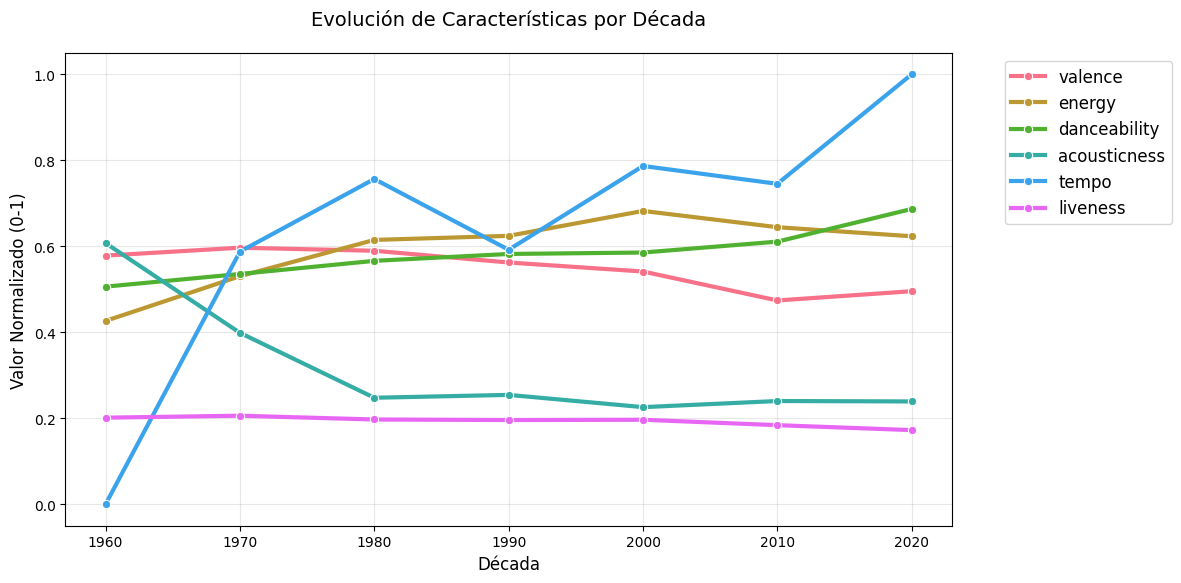

In [14]:
decade_means = df.groupby('decade')[features].mean().reset_index()
decade_means_normalized = decade_means.copy()
if 'tempo' in features:
    min_val = decade_means['tempo'].min()
    max_val = decade_means['tempo'].max()
    decade_means_normalized['tempo'] = (decade_means['tempo'] - min_val) / (max_val - min_val)

plt.figure(figsize=(12, 6))
palette = sns.color_palette("husl", n_colors=len(features))
for idx, feature in enumerate(features):
    sns.lineplot(data=decade_means_normalized, x='decade', y=feature,
                 marker='o', linewidth=3, label=feature,
                 color=palette[idx])

plt.title('Evolución de Características por Década', pad=20)
plt.xlabel('Década')
plt.ylabel('Valor Normalizado (0-1)')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

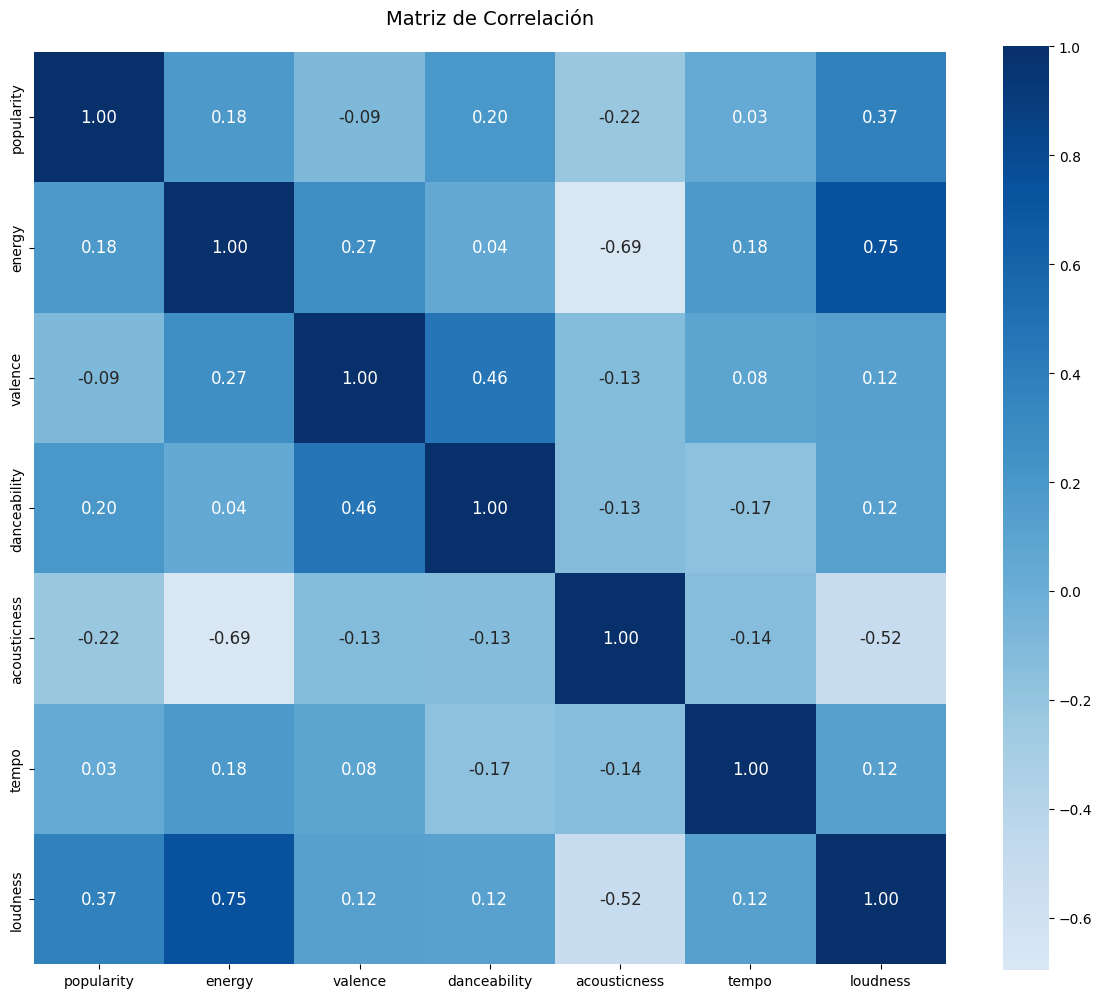

In [15]:
corr_features = ['popularity', 'energy', 'valence', 'danceability', 'acousticness', 'tempo', 'loudness']
corr_matrix = df[corr_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='Blues', 
            center=0,
            fmt='.2f',
            square=True,)
plt.title('Matriz de Correlación', pad=20)
plt.tight_layout()
plt.show()

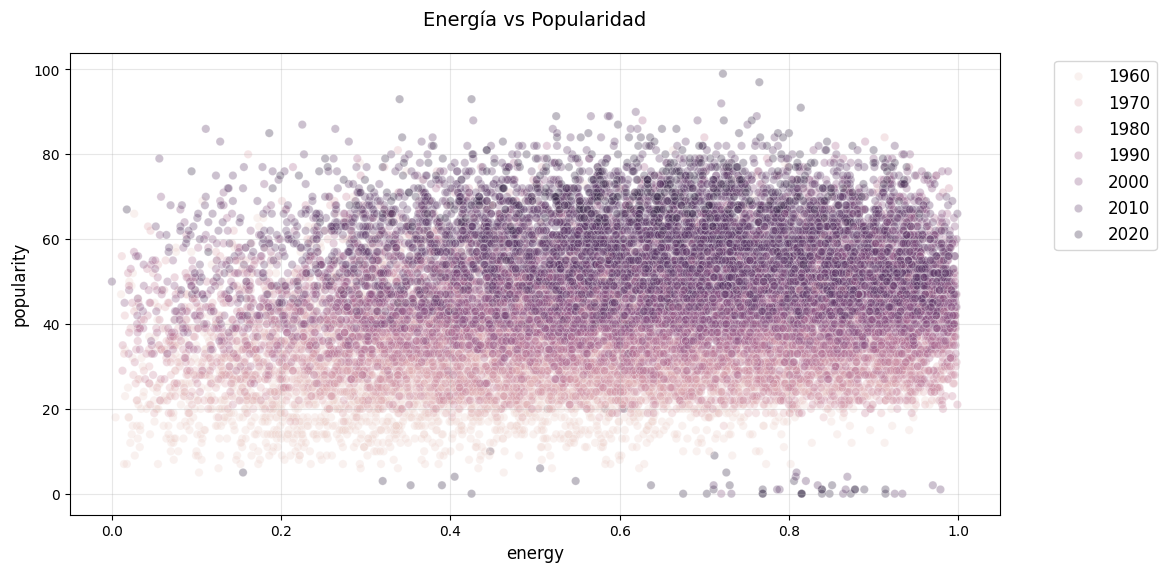

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='energy', y='popularity', hue='decade', alpha=0.3)
plt.title('Energía vs Popularidad', pad=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

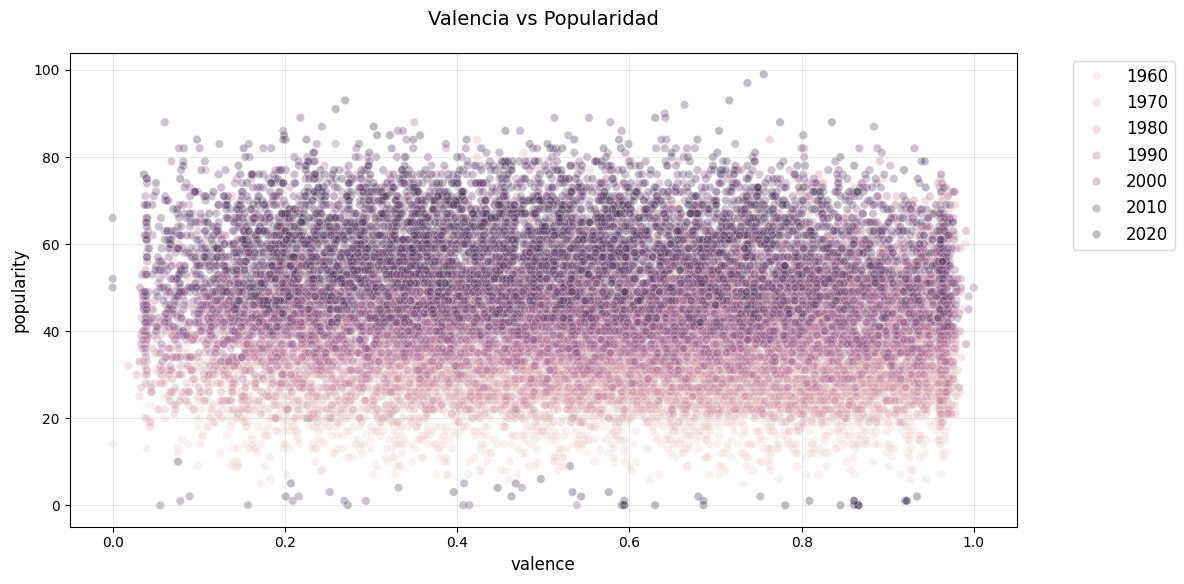

In [17]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='valence', y='popularity', hue='decade', alpha=0.3)
plt.title('Valencia vs Popularidad', pad=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

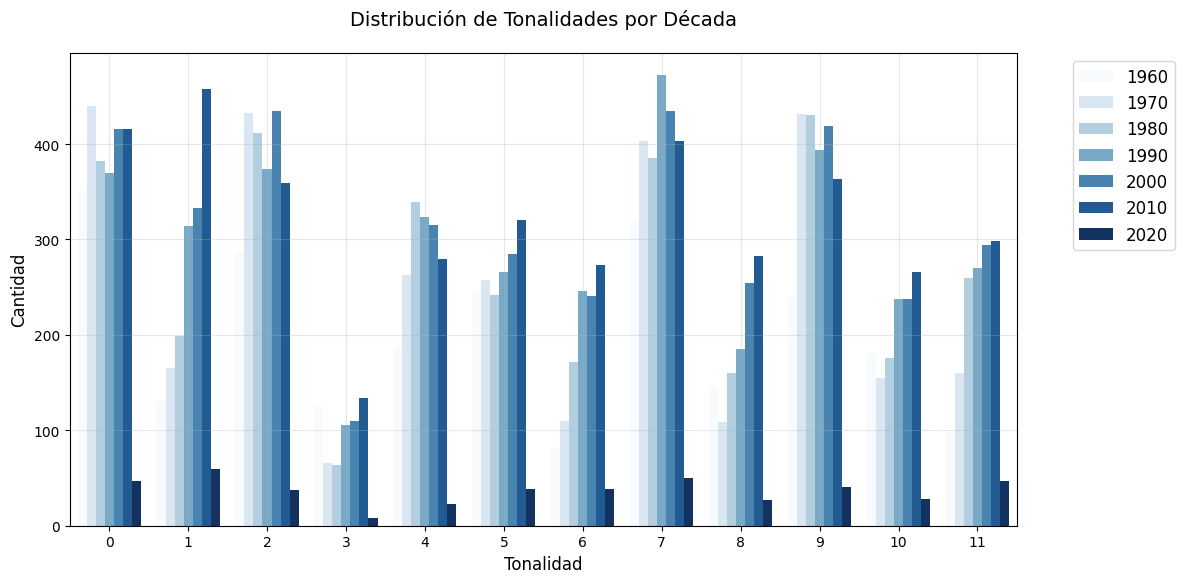

In [18]:
# Distribución de tonalidades por década
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='key', hue='decade', palette='Blues')
plt.title('Distribución de Tonalidades por Década', pad=20)
plt.xlabel('Tonalidad')
plt.ylabel('Cantidad')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

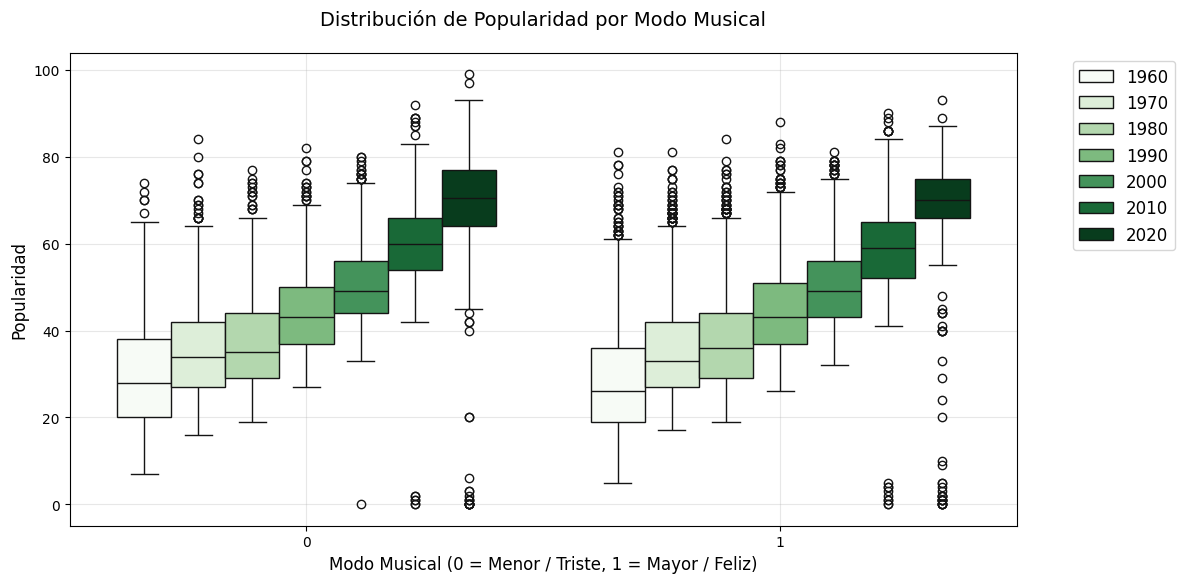

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='mode', y='popularity', palette='Greens', hue='decade')
plt.title('Distribución de Popularidad por Modo Musical', pad=20)
plt.xlabel('Modo Musical (0 = Menor / Triste, 1 = Mayor / Feliz)')
plt.ylabel('Popularidad')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

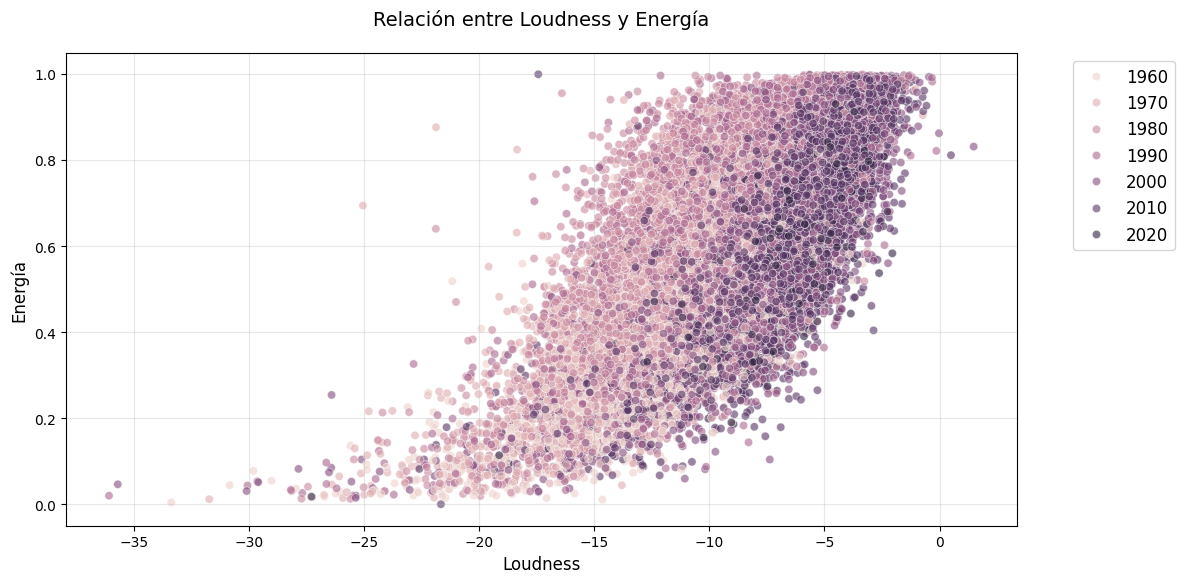

In [20]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='loudness', y='energy', hue='decade', alpha=0.6)
plt.title('Relación entre Loudness y Energía', pad=20)
plt.xlabel('Loudness')
plt.ylabel('Energía')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()